In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error


In [24]:
ftalany = pd.read_excel('ftalany.xlsx', sheet_name=['X_train', 'y_train', 'X_test', 'y_test'])
Xt = ftalany['X_train']
Yt = ftalany['y_train']
Xv = ftalany['X_test']
Yv = ftalany['y_test']
Xt = Xt.rename(columns={"qc-": "qc"})
Xv = Xv.rename(columns={"qc-": "qc"})

[Text(0.5452586206896551, 0.9375, 'x[1] <= 0.245\nsquared_error = 0.234\nsamples = 23\nvalue = -1.045'),
 Text(0.34913793103448276, 0.8125, 'x[1] <= -0.335\nsquared_error = 0.082\nsamples = 15\nvalue = -1.332'),
 Text(0.44719827586206895, 0.875, 'True  '),
 Text(0.21551724137931033, 0.6875, 'x[3] <= -1.259\nsquared_error = 0.033\nsamples = 10\nvalue = -1.492'),
 Text(0.10344827586206896, 0.5625, 'x[0] <= -1.354\nsquared_error = 0.005\nsamples = 3\nvalue = -1.741'),
 Text(0.06896551724137931, 0.4375, 'x[2] <= 1.094\nsquared_error = 0.0\nsamples = 2\nvalue = -1.793'),
 Text(0.034482758620689655, 0.3125, 'squared_error = 0.0\nsamples = 1\nvalue = -1.81'),
 Text(0.10344827586206896, 0.3125, 'squared_error = 0.0\nsamples = 1\nvalue = -1.776'),
 Text(0.13793103448275862, 0.4375, 'squared_error = -0.0\nsamples = 1\nvalue = -1.638'),
 Text(0.3275862068965517, 0.5625, 'x[2] <= 0.982\nsquared_error = 0.007\nsamples = 7\nvalue = -1.385'),
 Text(0.2413793103448276, 0.4375, 'x[2] <= 0.264\nsquared_

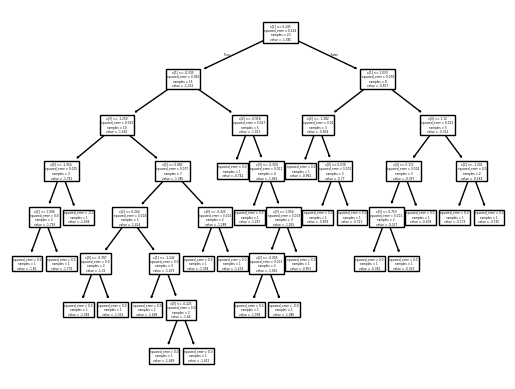

In [25]:
regressor = tree.DecisionTreeRegressor()
regressor.fit(Xt, Yt)
tree.plot_tree(regressor)


In [26]:
conmat = confusion_matrix(Yv, regressor.predict(Xv))
conmandis = ConfusionMatrixDisplay(confusion_matrix=conmat, display_labels=[1, 2])
conmandis.plot()
plt.show()

ValueError: continuous is not supported

In [27]:
y_pred_t = regressor.predict(Xt)
y_pred_v = regressor.predict(Xv)
R2 = r2_score(y_pred_t, Yt)
RMSEc = root_mean_squared_error(y_pred_t, Yt)
Q2ext = r2_score(y_pred_v, Yv)
RMSEext = root_mean_squared_error(y_pred_v, Yv)
print(f'R2 = {R2}\nRMSEc = {RMSEc}\nQ2ext = {Q2ext}\nRMSEext = {RMSEext}')

R2 = 1.0
RMSEc = 0.0
Q2ext = 0.7411022303216235
RMSEext = 0.19464590928144362


In [28]:
y_pred_t = regressor.predict(Xt)
y_pred_v = regressor.predict(Xv)
R2 = r2_score(Yt, y_pred_t)
RMSEc = np.sqrt(mean_squared_error(Yt, y_pred_t))
Q2ext = r2_score(Yv, y_pred_v)
RMSEext = np.sqrt(mean_squared_error(Yv, y_pred_v))
print(f'R2 = {R2}\nRMSEc = {RMSEc}\nQ2ext = {Q2ext}\nRMSEext = {RMSEext}')

R2 = 1.0
RMSEc = 0.0
Q2ext = 0.7776283866554117
RMSEext = 0.19464590928144362


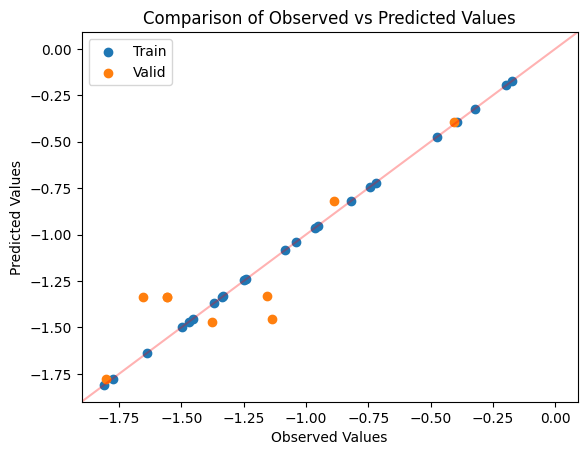

In [29]:
plt.scatter(Yt, y_pred_t, label=f'Train')
plt.scatter(Yv, y_pred_v, label=f'Valid')

# Add legend
plt.legend()

# Add a diagonal line for reference
plt.axline((0, 0), slope=1, color="red", alpha=0.3)

# Add title and labels
plt.title("Comparison of Observed vs Predicted Values")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")

# Show plot
plt.show()

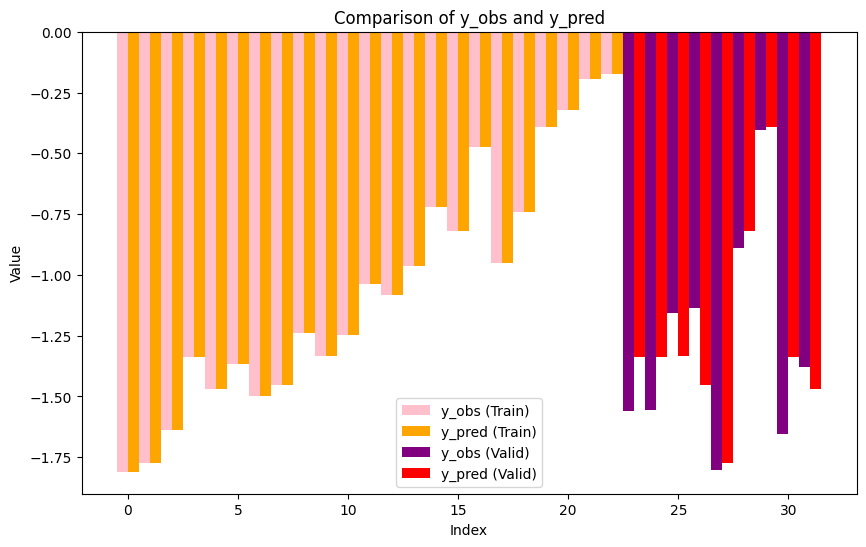

In [30]:
# Convert y_pred and y_obs to 1D arrays for easier plotting
y_pred_training_flat = y_pred_t.flatten()
y_obs_training_flat = Yt.squeeze().to_numpy()
y_pred_test_flat = y_pred_v.flatten()
y_obs_test_flat = Yv.squeeze().to_numpy()

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.5  # the width of the bars

# Plot y_obs and y_pred for training data side by side
ax.bar(np.arange(len(y_obs_training_flat)) - width/2, y_obs_training_flat, width, label='y_obs (Train)', color='pink')
ax.bar(np.arange(len(y_obs_training_flat)) + width/2, y_pred_training_flat, width, label='y_pred (Train)', color='orange')

# Plot y_obs and y_pred for test data side by side
ax.bar(np.arange(len(y_obs_training_flat), len(y_obs_training_flat) + len(y_obs_test_flat)) - width/2, y_obs_test_flat, width, label='y_obs (Valid)', color='purple')
ax.bar(np.arange(len(y_obs_training_flat), len(y_obs_training_flat) + len(y_obs_test_flat)) + width/2, y_pred_test_flat, width, label='y_pred (Valid)', color='red')

# Add labels and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Comparison of y_obs and y_pred')
ax.legend()

plt.show()